<a href="https://colab.research.google.com/github/Pablo-dev-uni/London_crime/blob/master/London_crime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# London Crime Data Analysis


*  Download the Data 
*  Structure the relevant data
* Visualise the data 
* Deploy a Classifying ML Algorithm 


# Downlaod the data
* Downloading two Databases 
* One database is from Kaggle called the Londo_crime
* The other is a downloaded file from the london DataStore


In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
import os
import numpy as np
import pandas as pd
import pandas_gbq

from google.cloud import bigquery


sql = """
    SELECT *
    FROM `bigquery-public-data.london_crime.crime_by_lsoa`
    
    
    
    
    
    
    
    
    
    
"""

# Run a Standard SQL query using the environment's default project


# Run a Standard SQL query with the project set explicitly
project_id = 'london-crime-data-251117'
df = pd.read_gbq(sql, project_id=project_id, dialect='standard')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving bbox.csv to bbox.csv


In [0]:
import io

df2 = pd.read_csv(io.BytesIO(uploaded['bbox.csv']))

In [0]:
uploaded = files.upload()

Saving Rankings.csv to Rankings.csv


In [0]:
rankings = pd.read_csv('Rankings.csv')

df=df.merge(rankings, left_on = 'major_category', right_on = 'major_category')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,ViCrime
0,E01003781,Redbridge,Violence Against the Person,Wounding/GBH,1,2015,9,1
1,E01003793,Redbridge,Violence Against the Person,Wounding/GBH,0,2008,3,1
2,E01003758,Redbridge,Violence Against the Person,Wounding/GBH,0,2014,3,1
3,E01003749,Redbridge,Violence Against the Person,Wounding/GBH,0,2014,1,1
4,E01003790,Redbridge,Violence Against the Person,Wounding/GBH,0,2016,2,1


In [0]:
df2.head() 
#Data taken from London DataStore

,lsoa,oa,left,bottom,right,top,EASTING,NORTHING,Latitude,Longitude
0,E01000001,E00000001,-0.096516,51.519759,-0.094389,51.520663,532270,181870,51.520269,-0.0950
1,E01000001,E00000003,-0.097048,51.519329,-0.095787,51.520325,532150,181820,51.519848,-0.0967
2,E01000001,E00000005,-0.097266,51.518459,-0.095761,51.519718,532190,181730,51.519030,-0.0962
3,E01000001,E00000007,-0.099908,51.514830,-0.094943,51.518628,532060,181490,51.516904,-0.0981
4,E01000003,E00000010,-0.097934,51.522172,-0.096914,51.522918,532100,182100,51.522376,-0.0973


In [0]:
df.head()
#Data taken from Kaggle 

,lsoa_code,borough,major_category,minor_category,value,year,month,ViCrime,lsoa_x,Latitude_x,Longitude_x,lsoa_y,Latitude_y,Longitude_y
0,E01003781,Redbridge,Violence Against the Person,Wounding/GBH,1,2015,9,1,E01003781,51.563814,0.0684,E01003781,51.563814,0.0684
1,E01003781,Redbridge,Violence Against the Person,Wounding/GBH,2,2015,8,1,E01003781,51.563814,0.0684,E01003781,51.563814,0.0684
2,E01003781,Redbridge,Violence Against the Person,Common Assault,0,2009,8,1,E01003781,51.563814,0.0684,E01003781,51.563814,0.0684
3,E01003781,Redbridge,Violence Against the Person,Common Assault,4,2014,9,1,E01003781,51.563814,0.0684,E01003781,51.563814,0.0684
4,E01003781,Redbridge,Violence Against the Person,Other violence,0,2012,9,1,E01003781,51.563814,0.0684,E01003781,51.563814,0.0684


# Structure the relevant data
* Use data from Kaggle and DataStore to convert lsoa_code to Latitude and Longitude
* Create a new DataFrame that containes the features and lables used to train the model 

In [0]:
t=df['lsoa_code'].unique()
#Finds all the unique 'lsoa_code'


In [0]:
lsoa_to_latlong = pd.DataFrame([])
for i in t:
  temp=df2[df2['lsoa'] == i].head(1)
  sel = ['lsoa','Latitude','Longitude']
  a = temp[sel]
  lsoa_to_latlong=lsoa_to_latlong.append(a)
# Searches the DataStore database for the same Lsoa_code
# Reads the relevent Latitude and Longitude Data 
# saves it a new dataframe  


In [0]:
lsoa_to_latlong.head()

,lsoa,Latitude,Longitude
18501,E01003781,51.563814,0.068400
18538,E01003793,51.564426,0.028222
18373,E01003758,51.565838,0.081100
18323,E01003749,51.606075,0.027500
18540,E01003790,51.563165,0.043900


In [0]:
df=df.merge(lsoa_to_latlong, left_on='lsoa_code', right_on='lsoa')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,ViCrime,lsoa_x,Latitude_x,Longitude_x,lsoa_y,Latitude_y,Longitude_y
0,E01003781,Redbridge,Violence Against the Person,Wounding/GBH,1,2015,9,1,E01003781,51.563814,0.0684,E01003781,51.563814,0.0684
1,E01003781,Redbridge,Violence Against the Person,Wounding/GBH,2,2015,8,1,E01003781,51.563814,0.0684,E01003781,51.563814,0.0684
2,E01003781,Redbridge,Violence Against the Person,Common Assault,0,2009,8,1,E01003781,51.563814,0.0684,E01003781,51.563814,0.0684
3,E01003781,Redbridge,Violence Against the Person,Common Assault,4,2014,9,1,E01003781,51.563814,0.0684,E01003781,51.563814,0.0684
4,E01003781,Redbridge,Violence Against the Person,Other violence,0,2012,9,1,E01003781,51.563814,0.0684,E01003781,51.563814,0.0684


In [0]:
len(df)

13490604

In [0]:

df.major_category = pd.Categorical(df.major_category)
df['major_category code'] = df.major_category.cat.codes

#Creates Codes for categories so they can be computed in a variety of ML 
#algorithms

#Visualise the data
* As this is a classifying problem a scatter plot must be seen.
* However other graphs can be useful for a better understanding of the data.
* Such as  "How crime is split among the boroughs?"
* Or 'How crime is split in a particular borough at a certain time?"

In [0]:
import matplotlib.pyplot as plt
def get_year(d,year):
  year = pd.DataFrame(d[d['year'] == year])
  return year

def get_borough(borough):
  borough = (df[df['borough'] == borough])
  return borough

def get_minor_category(minor_category):
  minor_category = pd.DataFrame(df[df['minor_category'] == minor_category])
  return minor_category
  
  
def Tally(d,category):
  dups_category = d.pivot_table(index=[category] ,aggfunc='size')
  return dups_category

%matplotlib inline



<function matplotlib.pyplot.show>

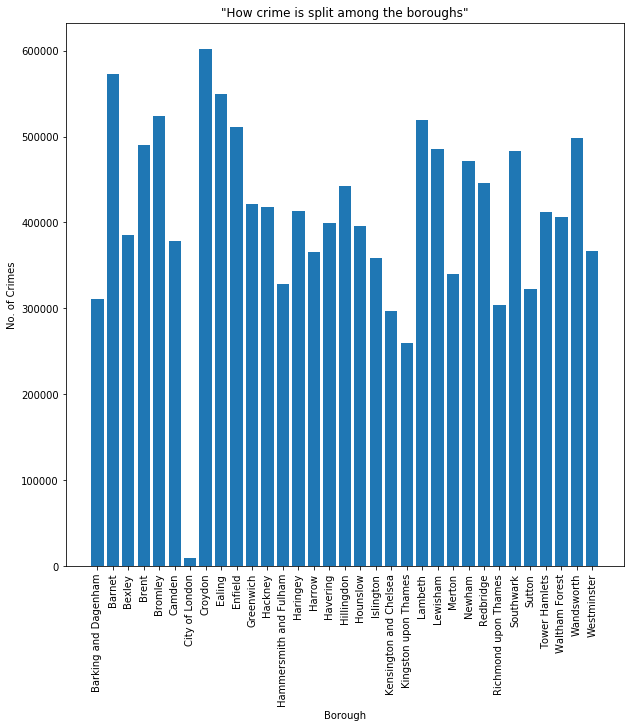

In [0]:
plt.figure(figsize=[10,10])
array= df['borough'].unique()
lis = array.tolist()
lis.sort()
info=Tally(df,"borough")
plt.bar(lis,info)
plt.xlabel('Borough')
plt.ylabel('No. of Crimes')
plt.title('"How crime is split among the boroughs"')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show>

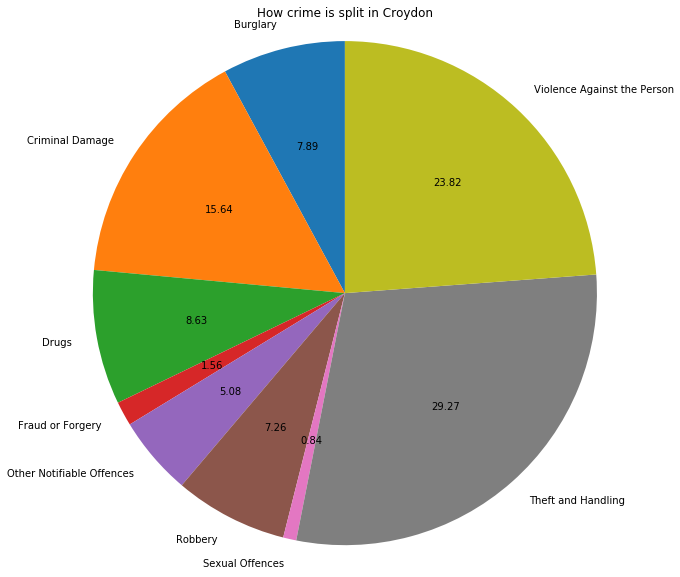

In [0]:
data=get_borough("Croydon")
d=Tally(data,'major_category')
a= df['major_category'].unique()
b = a.tolist()
b.sort()
plt.figure(figsize=[10,10])
plt.pie(d,labels=b[0:len(d)],autopct='%1.2f',startangle=90)
plt.axis('equal')
plt.title("How crime is split in Croydon")
plt.show

In [0]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,ViCrime,lsoa_x,Latitude_x,Longitude_x,lsoa_y,Latitude_y,Longitude_y,major_category code
8965620,E01001051,Croydon,Violence Against the Person,Murder,0,2016,7,1,E01001051,51.356653,-0.022,E01001051,51.356653,-0.022,8
8965621,E01001051,Croydon,Violence Against the Person,Harassment,0,2015,11,1,E01001051,51.356653,-0.022,E01001051,51.356653,-0.022,8
8965622,E01001051,Croydon,Violence Against the Person,Harassment,4,2014,3,1,E01001051,51.356653,-0.022,E01001051,51.356653,-0.022,8
8965623,E01001051,Croydon,Violence Against the Person,Harassment,1,2014,2,1,E01001051,51.356653,-0.022,E01001051,51.356653,-0.022,8
8965624,E01001051,Croydon,Violence Against the Person,Harassment,0,2012,1,1,E01001051,51.356653,-0.022,E01001051,51.356653,-0.022,8


<function matplotlib.pyplot.show>

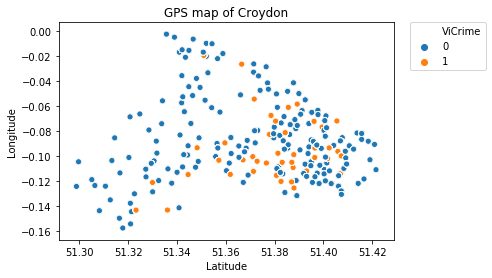

In [191]:
import seaborn as sb

  
  
label = data['ViCrime']
fet = ["Latitude_x","Longitude_x","year"]
x = data[fet].values
x = np.array(x)
lat= x[:,0]
lon=x[:,1]
year =x[:,2]

sb.scatterplot(lat,lon ,hue = label)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("GPS map of Croydon")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show

In [0]:
= data['Latitude_x'].unique()
len(a)

220